![Title](https://mycanopy.org/wp-content/uploads/2020/01/Autism-Puzzle-Banner.jpg)

# <h1><center>Predicting Autistic Traits in Toddlers</center></h1>

<hr>

## Executive Summary
* The goal of this project was to produce a model that can accurately predict autistic traits in toddlers based on responses provided in ASDTest app
* Significant relationship detected between males with jaundice and asd traits
* Baseline accuracy: 72.4% (the score we want to beat with our model)
* Accuracy of tested MVP KNN model increased accuracy by ~17%
* Accurary of tested 2nd KNN interation with feature engineering increased accuracy by ~22%

## Goals
* Predict toddlers that display autistic traits


## Hypotheses
1. Having a family member with autism does not effect autistic traits
2. Having a jaundice as a baby does not effect autistic traits

## Plan
* acquire the data from kaggle
* clean/prep the data
* explore features of data
* model data
* evaluate data

## Imports

In [1]:
#import modules
import wrangle as w
import explore
import model

# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#imports for model object and metric functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#visulization settings
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.style as style 
style.available
style.use('seaborn-notebook') #sets the size of the charts
style.use('seaborn-colorblind') #sets color of charts

## Acquire

<div class="alert alert-block alert-success">
<b>Acquire Summary :</b> 
<br>- This dataset was developed by Dr Fadi Fayez Thabtah using a mobile app called ASDTests (ASDtests.com) to screen for autism traits in toddlers and acquired in csv format from kaggle.com.  
<br>- This data set has 1054 rows and 19 columns</div> 

In [2]:
df = w.wrangle_autism()

In [3]:
df.head()

,name_response,eye_contact,pointing,shared_interest,pretend_play,joint_attention,emotions,vocal,gestures,blank_gaze,age,ethnicity,jaundice,family_mem_with_asd,asd_traits,sex_m
Case_No,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,1,0,1,28,3,1,0,0,0
2,1,1,0,0,0,1,1,0,0,0,36,1,1,0,1,1
3,1,0,0,0,0,0,1,1,0,1,36,3,1,0,1,1
4,1,1,1,1,1,1,1,1,1,1,24,5,0,0,1,1
5,1,1,0,1,1,1,1,1,1,1,20,1,0,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 1 to 1054
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   name_response        1054 non-null   int64
 1   eye_contact          1054 non-null   int64
 2   pointing             1054 non-null   int64
 3   shared_interest      1054 non-null   int64
 4   pretend_play         1054 non-null   int64
 5   joint_attention      1054 non-null   int64
 6   emotions             1054 non-null   int64
 7   vocal                1054 non-null   int64
 8   gestures             1054 non-null   int64
 9   blank_gaze           1054 non-null   int64
 10  age                  1054 non-null   int64
 11  ethnicity            1054 non-null   int64
 12  jaundice             1054 non-null   int64
 13  family_mem_with_asd  1054 non-null   int64
 14  asd_traits           1054 non-null   int64
 15  sex_m                1054 non-null   uint8
dtypes: int64(15), uint8(1)
m

In [5]:
df.describe()

,name_response,eye_contact,pointing,shared_interest,pretend_play,joint_attention,emotions,vocal,gestures,blank_gaze,age,ethnicity,jaundice,family_mem_with_asd,asd_traits,sex_m
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,2.354839,0.273245,0.161290,0.690702,0.697343
std,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,1.398442,0.445837,0.367973,0.462424,0.459626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,2.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,3.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,6.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(1054, 16)

## Prepare

<div class="alert alert-block alert-success">
<b>Prepare Summary :</b> 
<br>- This dataset was acquired as a csv from kaggle, then turned into a dataframe. 
<br>- A1-A10 columns were renamed to represent the type of question they contained
<br>- Dummies were made from 'sex' column
<br>- Columns such as asd_traits, jaundice, and family_mem_with_asd were turned into binary columns
<br>- ethinicity was condensed from 11 ethinicities to 6 ethnicities: 1 = white european, 2 = asian, south asian, 3 = middle eastern, 4 = black, 5 = hispanic, latino, 6 = others, mixed, pacifica, and native american
<br>- Columns 'Qchat-10-Score', 'Who completed the test', and 'sex' were dropped from the dataframe
<br>- 'Case_no' was reset as the index
<br>- This dataset did not contain any nulls 
<br>- Dataset was split into train, validate, and test dataframes    
</div> 

### Split

In [7]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = w.train_validate_test_split(df, 'asd_traits', 123)

In [8]:
print(train.shape)
print(validate.shape)
print(test.shape)

(590, 16)
(253, 16)
(211, 16)


## Explore

### Univariate

<div class="alert alert-block alert-success">
<b>Univariate Takeaways :</b> 
<br>- 56% of toddlers in this dataset respond to name when called
<br>- 55% of toddlers in this dataset make eye contact 
<br>- 60% of toddlers in this dataset point to what they want  
<br>- 51% of toddlers in this dataset show shared_interest
<br>- 52% of toddlers in this dataset engage in pretend play 
<br>- 58% of toddlers in this dataset show joint attention
<br>- 65% of toddlers in this dataset social emotion recognition
<br>- 54% of toddlers in this dataset are not vocal
<br>- 51% of toddlers in this dataset can communicate using gestures
<br>- 59% of toddlers in this dataset engage in blank gazing
<br>- The majority (34%) of toddlers in this data set are middle eastern
<br>- 73% of toddlers in this dataset had jaundice as a baby
<br>- 84% of toddlers in this dataset do not have a family member with asd
<br>- Age is mostly normally distributed, with a spike at the 35 month age    
</div> 

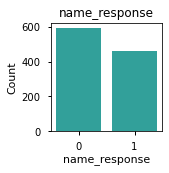

   name_response  Count  Percent
1              0    594    56.36
0              1    460    43.64
_________________________________________________________________


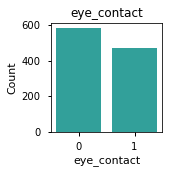

   eye_contact  Count  Percent
0            0    581    55.12
1            1    473    44.88
_________________________________________________________________


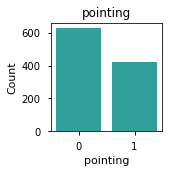

   pointing  Count  Percent
0         0    631    59.87
1         1    423    40.13
_________________________________________________________________


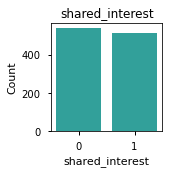

   shared_interest  Count  Percent
1                0    540    51.23
0                1    514    48.77
_________________________________________________________________


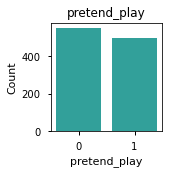

   pretend_play  Count  Percent
1             0    553    52.47
0             1    501    47.53
_________________________________________________________________


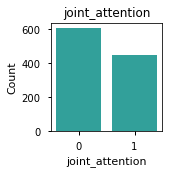

   joint_attention  Count  Percent
1                0    608    57.69
0                1    446    42.31
_________________________________________________________________


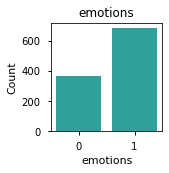

   emotions  Count  Percent
1         1    685    64.99
0         0    369    35.01
_________________________________________________________________


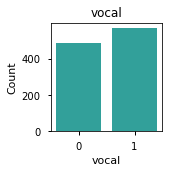

   vocal  Count  Percent
0      1    570    54.08
1      0    484    45.92
_________________________________________________________________


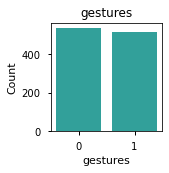

   gestures  Count  Percent
0         0    538    51.04
1         1    516    48.96
_________________________________________________________________


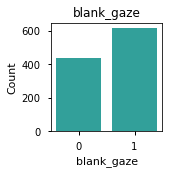

   blank_gaze  Count  Percent
1           1    618    58.63
0           0    436    41.37
_________________________________________________________________


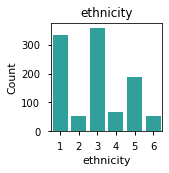

   ethnicity  Count  Percent
2          3    359    34.06
1          1    334    31.69
3          5    188    17.84
5          4     66     6.26
6          2     54     5.12
4          6     53     5.03
_________________________________________________________________


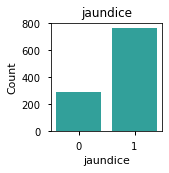

   jaundice  Count  Percent
0         1    766    72.68
1         0    288    27.32
_________________________________________________________________


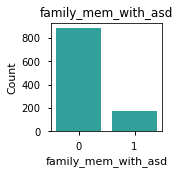

   family_mem_with_asd  Count  Percent
0                    0    884    83.87
1                    1    170    16.13
_________________________________________________________________


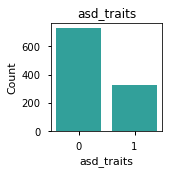

   asd_traits  Count  Percent
1           0    728    69.07
0           1    326    30.93
_________________________________________________________________


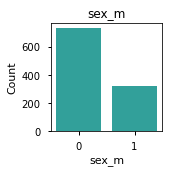

   sex_m  Count  Percent
1      0    735    69.73
0      1    319    30.27
_________________________________________________________________


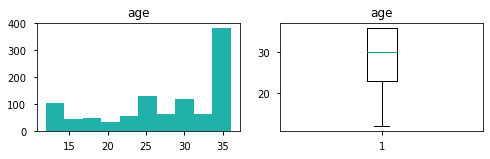

count    1054.000000
mean       27.867173
std         7.980354
min        12.000000
25%        23.000000
50%        30.000000
75%        36.000000
max        36.000000
Name: age, dtype: float64


In [9]:
explore.explore_univariate(df, explore.cat_vars, explore.quant_vars)

### Bivariate

<div class="alert alert-block alert-success">
<b>Bivariate Takeaways :</b> 
<br>- Binary target variable = asd_traits    
<br>- Age does not seem to be correlated with asd traits
<br>- More males display autistic traits than females
<br>- Middle eastern toddlers have a lower rate of autistic traits    
<br>- More toddlers with autistic traits have higher rates of jaundice</div> 

name_response 
_____________________

         chi2       p-value  degrees of freedom
0  142.434654  7.813447e-33                   1

observed:
 asd_traits       0    1  All
name_response               
0              133  115  248
1               30  312  342
All            163  427  590

expected:
            0           1
0  68.515254  179.484746
1  94.484746  247.515254


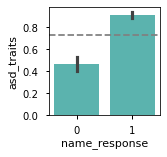


_____________________

eye_contact 
_____________________

         chi2       p-value  degrees of freedom
0  105.480515  9.583564e-25                   1

observed:
 asd_traits     0    1  All
eye_contact               
0            145  177  322
1             18  250  268
All          163  427  590

expected:
            0           1
0  88.959322  233.040678
1  74.040678  193.959322


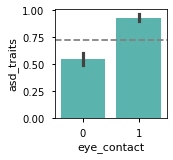


_____________________

pointing 
_____________________

         chi2       p-value  degrees of freedom
0  101.506912  7.121450e-24                   1

observed:
 asd_traits    0    1  All
pointing                 
0           149  193  342
1            14  234  248
All         163  427  590

expected:
            0           1
0  94.484746  247.515254
1  68.515254  179.484746


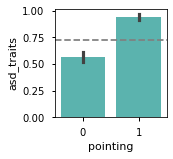


_____________________

shared_interest 
_____________________

         chi2       p-value  degrees of freedom
0  142.579053  7.265572e-33                   1

observed:
 asd_traits         0    1  All
shared_interest               
0                140  131  271
1                 23  296  319
All              163  427  590

expected:
            0           1
0  74.869492  196.130508
1  88.130508  230.869492


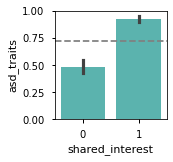


_____________________

pretend_play 
_____________________

         chi2       p-value  degrees of freedom
0  181.535951  2.239070e-41                   1

observed:
 asd_traits      0    1  All
pretend_play               
0             148  122  270
1              15  305  320
All           163  427  590

expected:
           0          1
0  74.59322  195.40678
1  88.40678  231.59322


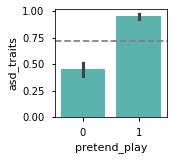


_____________________

joint_attention 
_____________________

         chi2       p-value  degrees of freedom
0  189.772483  3.564456e-43                   1

observed:
 asd_traits         0    1  All
joint_attention               
0                139   97  236
1                 24  330  354
All              163  427  590

expected:
       0      1
0  65.2  170.8
1  97.8  256.2


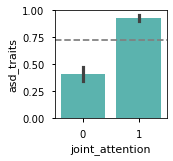


_____________________

emotions 
_____________________

        chi2       p-value  degrees of freedom
0  160.89785  7.202484e-37                   1

observed:
 asd_traits    0    1  All
emotions                 
0           117   72  189
1            46  355  401
All         163  427  590

expected:
             0           1
0   52.215254  136.784746
1  110.784746  290.215254


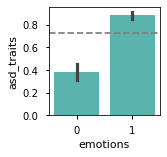


_____________________

vocal 
_____________________

        chi2       p-value  degrees of freedom
0  91.922545  9.013627e-22                   1

observed:
 asd_traits    0    1  All
vocal                    
0           140  177  317
1            23  250  273
All         163  427  590

expected:
            0           1
0  87.577966  229.422034
1  75.422034  197.577966


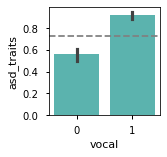


_____________________

gestures 
_____________________

         chi2       p-value  degrees of freedom
0  200.165715  1.921627e-45                   1

observed:
 asd_traits    0    1  All
gestures                 
0           158  134  292
1             5  293  298
All         163  427  590

expected:
            0           1
0  80.671186  211.328814
1  82.328814  215.671186


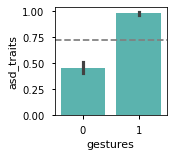


_____________________

blank_gaze 
_____________________

        chi2   p-value  degrees of freedom
0  19.317897  0.000011                   1

observed:
 asd_traits    0    1  All
blank_gaze               
0            92  154  246
1            71  273  344
All         163  427  590

expected:
            0           1
0  67.962712  178.037288
1  95.037288  248.962712


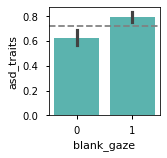


_____________________

ethnicity 
_____________________

        chi2   p-value  degrees of freedom
0  32.920763  0.000004                   5

observed:
 asd_traits    0    1  All
ethnicity                
1            41  149  190
2            55  163  218
3            51   53  104
4             5   20   25
5             8   17   25
6             3   25   28
All         163  427  590

expected:
            0           1
0  52.491525  137.508475
1  60.227119  157.772881
2  28.732203   75.267797
3   6.906780   18.093220
4   6.906780   18.093220
5   7.735593   20.264407


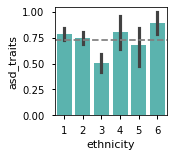


_____________________

jaundice 
_____________________

      chi2   p-value  degrees of freedom
0  4.86779  0.027363                   1

observed:
 asd_traits    0    1  All
jaundice                 
0           133  309  442
1            30  118  148
All         163  427  590

expected:
             0           1
0  122.111864  319.888136
1   40.888136  107.111864


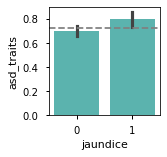


_____________________

family_mem_with_asd 
_____________________

       chi2   p-value  degrees of freedom
0  1.945139  0.163112                   1

observed:
 asd_traits             0    1  All
family_mem_with_asd               
0                    134  372  506
1                     29   55   84
All                  163  427  590

expected:
            0          1
0  139.79322  366.20678
1   23.20678   60.79322


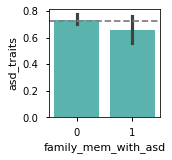


_____________________

asd_traits 
_____________________

         chi2        p-value  degrees of freedom
0  585.009234  3.051254e-129                   1

observed:
 asd_traits    0    1  All
asd_traits               
0           163    0  163
1             0  427  427
All         163  427  590

expected:
             0           1
0   45.032203  117.967797
1  117.967797  309.032203


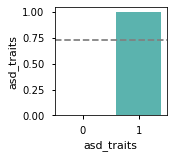


_____________________

sex_m 
_____________________

        chi2   p-value  degrees of freedom
0  12.383221  0.000433                   1

observed:
 asd_traits    0    1  All
sex_m                    
0            66  108  174
1            97  319  416
All         163  427  590

expected:
             0           1
0   48.071186  125.928814
1  114.928814  301.071186


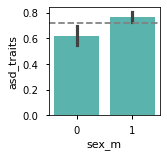


_____________________

age 
____________________



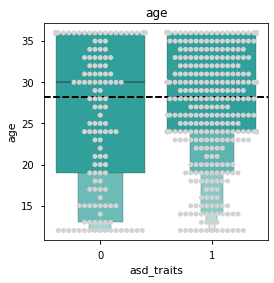

            count       mean       std   min   25%   50%   75%   max
asd_traits                                                          
0           163.0  27.319018  9.011451  12.0  19.0  30.0  36.0  36.0
1           427.0  28.533958  7.309756  12.0  24.0  30.0  36.0  36.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=33604.0, pvalue=0.5115652355934631)

____________________



In [10]:
explore.explore_bivariate(train, 'asd_traits', explore.cat_vars, explore.quant_vars)

### Male vs Females with Jaundice

Text(0.5, 1.0, 'More Males Born with Jaundice')

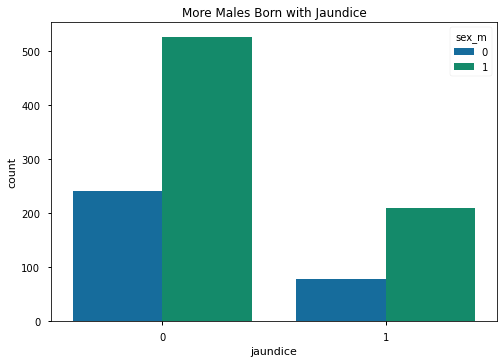

In [78]:
sns.countplot(x = 'jaundice', hue = 'sex_m', data = df)
plt.title('More Males Born with Jaundice')

<div class="alert alert-block alert-success">
<b>Jaundice vs Asd Traits :</b> 
<br>-  Males display higher levels of jaundice than females  
<br>-  This was very interesting because I was not expecting this outcome since jaundice is a common condition in newborns. 
<br>-  After hypothesis tested revealed significance I did some research and found that there is indeed a significant relationship between jaundice and autism: (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4285414/)
</div> 

### Ethnicity vs Asd Traits

Text(0.5, 1.0, 'White Europeans and Asians display Highest ASD Traits')

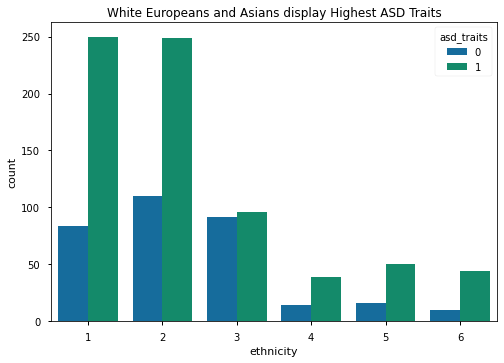

In [12]:
sns.countplot(x = 'ethnicity', hue = 'asd_traits', data = df)
plt.title('White Europeans and Asians display Highest ASD Traits')

<div class="alert alert-block alert-success">
<b>Ethnicity vs Asd Traits :</b> 
<br>-  White Europeans and Asians display the highest count of toddlers with asd traits   
</div> 

### Histogram: Age vs Asd Traits

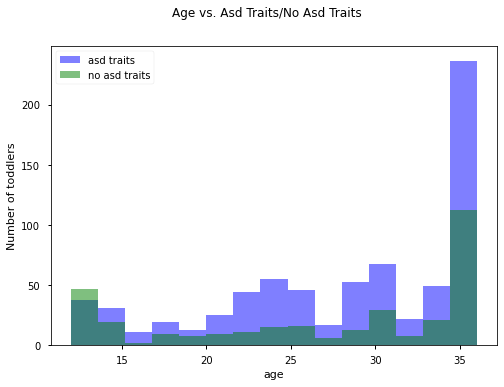

In [13]:
fig, ax = plt.subplots()

ax.hist(df[df["asd_traits"]==1]["age"], bins=15, alpha=0.5, color="blue", label="asd traits")
ax.hist(df[df["asd_traits"]==0]["age"], bins=15, alpha=0.5, color="green", label="no asd traits")

ax.set_xlabel("age")
ax.set_ylabel("Number of toddlers")

fig.suptitle("Age vs. Asd Traits/No Asd Traits")

ax.legend();

<div class="alert alert-block alert-success">
<b>Age vs Asd Traits :</b> 
<br>-  Over 300 toddlers in the dataset show asd traits around 35 months
<br>-  35 months is approximately 3 years and plenty of time has passed to determine if milestones are being met/progress is being made    
</div> 

### PDF: Age vs Asd Traits

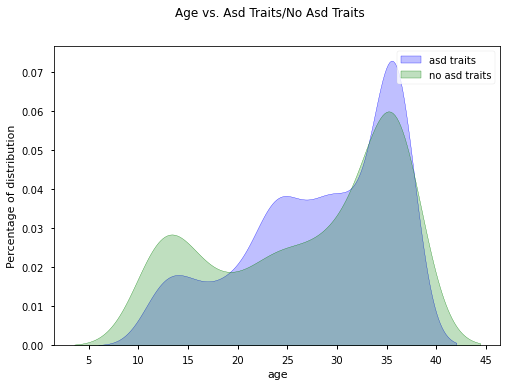

In [14]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["asd_traits"]==1]["age"],shade=True, color="blue",label="asd traits", ax=ax)
sns.kdeplot(df[df["asd_traits"]==0]["age"],shade=True, color="green", label="no asd traits", ax=ax)

ax.set_xlabel("age")
ax.set_ylabel("Percentage of distribution")

fig.suptitle("Age vs. Asd Traits/No Asd Traits")

ax.legend();

<div class="alert alert-block alert-success">
<b>Age vs Asd Traits :</b> 
<br>-  The distribution between toddlers with asd traits and those without asd traits differs at 5-15 months and 20-35 months     
</div> 

### Top 10 Correlations with asd_traits

In [15]:
#Top 10 Correlations with asd traits
train.corr().iloc[14].sort_values(ascending=False)[0:10]

asd_traits         1.000000
gestures           0.586254
joint_attention    0.571009
pretend_play       0.558501
emotions           0.526276
shared_interest    0.495392
name_response      0.495179
eye_contact        0.426631
pointing           0.418623
vocal              0.398517
Name: asd_traits, dtype: float64

## Hypothesis Testing

In [16]:
# set alpha and confidence interval before running any tests
alpha = .05
confidence_level = .95

### Hypothesis 1:  
* HO:  Having a family member with autism does not effect autistic traits
* HA:  Having a family member with autism does effect autistic traits

In [17]:
w.chi2(df, 'family_mem_with_asd', 'asd_traits', alpha)

Observed

[[271 613]
 [ 55 115]]
---
Expected

[[273.41935484 610.58064516]
 [ 52.58064516 117.41935484]]
---

chi^2 = 0.1209
p     = 0.7280

There is insufficient evidence to reject the null hypothesis


<div class="alert alert-block alert-success">
<b>Hypothesis 1 :</b> 
<br>-  I expected there to be some sort of effect detected between having a family member with autism, but the pvalue was above alpha so we fail to reject the null hypothesis.     
</div> 

### Hypothesis 2:  
* HO:  Having a jaundice as a baby does not effect autistic traits
* HA:  Having a jaundice as a baby does effect autistic traits

In [18]:
w.chi2(df, 'jaundice', 'asd_traits', alpha)

Observed

[[253 513]
 [ 73 215]]
---
Expected

[[236.92220114 529.07779886]
 [ 89.07779886 198.92220114]]
---

chi^2 = 5.4270
p     = 0.0198

Becasue the p-value: 0.0198 is less than alpha: 0.05, we can reject the null hypothesis


<div class="alert alert-block alert-success">
<b>Hypothesis 2 :</b> 
<br>-  This was also interesting to see that having jaundice as a baby has an effect on displaying autistic traits as a toddler.    
</div> 

### Scale 

In [19]:
#scaling before we model
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = w.Standard_Scaler(X_train, X_validate, X_test)

## MVP

## Baseline

<div class="alert alert-block alert-success">
<b>Baseline Takeaways :</b> 
<br>- Baseline will be toddlers that have asd traits
<br>- Baseline accuracy: <b> 72.4% </b>(the score we want to beat with our model) </div> 

In [20]:
#Count of toddlers with asd traits =1 and without asd traits = 0
train.asd_traits.value_counts()

1    427
0    163
Name: asd_traits, dtype: int64

In [21]:
#Baseline prediction will be mode, which is 1, toddlers with asd traits
train['baseline_prediction'] = 1

In [22]:
#Baseline accuracy
baseline_accuracy = round((train.asd_traits == 1).mean(), 3)
baseline_accuracy

0.724

## Model KNN

<div class="alert alert-block alert-success">
<b>KNN Takeaways :</b> 
<br>- Baseline accuracy: <b> 72.4% </b>(the score we want to beat with our model) 
<br>- Accuracy score of <b> 85% </b> beats baseline</div> 

In [23]:
#Features I want to train on
features1 = ['gestures', 'joint_attention', 'pretend_play']
#make model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
#fit model
knn.fit(X_train_scaled[features1], y_train)

KNeighborsClassifier()

In [24]:
#make predictions
y_pred_knn = knn.predict(X_train_scaled[features1])
#estimate probability
y_pred_proba = knn.predict_proba(X_train_scaled[features1])

## Evaluate KNN

In [25]:
#accuracy
accuracy = knn.score(X_train_scaled[features1], y_train)
print(f"KNN Accuracy is {accuracy:.5}")

KNN Accuracy is 0.88814


In [26]:
#confustion matrix
print(confusion_matrix(y_train, y_pred_knn))

[[123  40]
 [ 26 401]]


In [27]:
#classification report
#confustion matrix
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       163
           1       0.91      0.94      0.92       427

    accuracy                           0.89       590
   macro avg       0.87      0.85      0.86       590
weighted avg       0.89      0.89      0.89       590



## Validate KNN

In [28]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate_scaled[features1], y_validate)))

Accuracy of KNN classifier on validate set: 0.85


## Model Decision Tree

<div class="alert alert-block alert-success">
<b>Decision Tree Takeaways :</b> 
<br>- Baseline accuracy: <b> 72.4% </b>(the score we want to beat with our model) 
<br>- DT Accuracy score of <b> 72.4% </b> does not beat baseline</div> 

In [29]:
#Create the Decision Tree object with desired hyper-parameters
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [30]:
#Fit the model
clf = clf.fit(X_train_scaled, y_train)
clf

DecisionTreeClassifier(max_depth=3, random_state=123)

In [31]:
#make predictions on observations
y_pred_dt = clf.predict(X_train_scaled)
y_pred_dt[0:5]

array([1, 0, 0, 1, 1])

In [32]:
#estimate probability of asd traits
y_pred_proba_dt = clf.predict_proba(X_train_scaled)
y_pred_proba_dt

array([[0.06122449, 0.93877551],
       [0.5       , 0.5       ],
       [0.93137255, 0.06862745],
       ...,
       [0.54166667, 0.45833333],
       [0.93137255, 0.06862745],
       [0.5       , 0.5       ]])

## Evaluate Decision Tree

In [33]:
#compute the accuracy 
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train_scaled, y_train)))

Accuracy of Decision Tree classifier on training set: 0.88


In [34]:

# confusion matrix
confusion_matrix(y_train, y_pred_dt)

array([[153,  10],
       [ 59, 368]])

In [35]:
y_train.value_counts()

1    427
0    163
Name: asd_traits, dtype: int64

In [36]:
#classification report
print(classification_report(y_train, y_pred_dt))

              precision    recall  f1-score   support

           0       0.72      0.94      0.82       163
           1       0.97      0.86      0.91       427

    accuracy                           0.88       590
   macro avg       0.85      0.90      0.87       590
weighted avg       0.90      0.88      0.89       590



In [37]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate_scaled, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.88


In [38]:
import model

In [39]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate_scaled)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83        88
           1       0.94      0.87      0.90       165

    accuracy                           0.88       253
   macro avg       0.86      0.88      0.87       253
weighted avg       0.88      0.88      0.88       253



In [40]:
def get_metrics_binary(clf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a binary classifier and prints out metrics based on
    values in variables named X_train, y_train, and y_pred.
    
    return: a classification report as a transposed DataFrame
    '''
    accuracy = clf.score(X_train, y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred_dt, output_dict=True)).T
    conf = confusion_matrix(y_train, y_pred_dt)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report

In [41]:
report_df = get_metrics_binary(clf)


    The accuracy for our model is 0.7237
    The True Positive Rate is 0.862, The False Positive Rate is 0.0613,
    The True Negative Rate is 0.939, and the False Negative Rate is 0.138
    


In [42]:
report_df

,precision,recall,f1-score,support
0,0.721698,0.938650,0.816000,163.000000
1,0.973545,0.861827,0.914286,427.000000
accuracy,0.883051,0.883051,0.883051,0.883051
macro avg,0.847622,0.900239,0.865143,590.000000
weighted avg,0.903967,0.883051,0.887132,590.000000


## Model Logistic Regression

<div class="alert alert-block alert-success">
<b>Logistic Regression Takeaways :</b> 
<br>- Baseline accuracy: <b> 72.4% </b>(the score we want to beat with our model) 
<br>- Accuracy score of <b> 85% </b> beats baseline</div> 

In [43]:
# Create the logistic regression model from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=123) #Went with default hyperparameters

# we will use same features 
features2 = ['gestures', 'joint_attention', 'pretend_play']

# Fit the model
logit.fit(X_train_scaled[features2], y_train)

LogisticRegression(random_state=123)

In [44]:
# feature importance
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[1.57475585 1.02593207 1.13552792]]
Intercept: 
 [2.53231456]


In [45]:
#Make predictions
y_pred_lg = logit.predict(X_train_scaled[features2])

#estimate probability
y_pred_lg_proba = logit.predict_proba(X_train_scaled[features2])

## Evaluate Logistic Regression

In [46]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train_scaled[features2], y_train)))

Accuracy of Logistic Regression classifier on training set: 0.89


In [47]:
print("Baseline is", baseline_accuracy,)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train_scaled[features2], y_train)))

Baseline is 0.724
Accuracy of Logistic Regression classifier on training set: 0.89


In [48]:
#confusion matrix
print(confusion_matrix(y_train, y_pred_lg))

[[123  40]
 [ 26 401]]


In [49]:
#classification report
print(classification_report(y_train, y_pred_lg))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       163
           1       0.91      0.94      0.92       427

    accuracy                           0.89       590
   macro avg       0.87      0.85      0.86       590
weighted avg       0.89      0.89      0.89       590



## Validate Logistic Regression

In [50]:
y_pred_lg = logit.predict(X_validate_scaled[features2])

In [51]:
print('Accuracy: {:.2f}'.format(logit.score(X_validate_scaled[features2], y_validate)))

Accuracy: 0.85


## Test on Best

<div class="alert alert-block alert-success">
<b>Test on Best :</b> 
<br>- Baseline accuracy: <b> 72.4% </b>(the score we want to beat with our model) 
<br>- Accuracy score of KNN and Logistic Regression models was <b> 85% </b>, so F1 score was used to determine best model, which was KNN model.
<br>- Accuracy of tested KNN model was <b> 85% </b> </div> 

In [52]:
y_test.head()

Case_No
319     1
985     1
647     1
1017    1
492     1
Name: asd_traits, dtype: int64

In [53]:
y_pred_test = knn.predict(X_test_scaled[features1])
y_pred_proba_test = knn.predict_proba(X_test_scaled[features1])
print('Accuracy: {:.2f}'.format(knn.score(X_test_scaled[features1], y_test)))

Accuracy: 0.85


<hr>

## 2nd Iteration

## Acquire and Prep

<div class="alert alert-block alert-success">
<b>Acquire an Prep Summary :</b> 
<br>- The same steps to acquire and prep the data were performed on the second iteration. </div> 

In [54]:
df2 = w.wrangle_autism()

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 1 to 1054
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   name_response        1054 non-null   int64
 1   eye_contact          1054 non-null   int64
 2   pointing             1054 non-null   int64
 3   shared_interest      1054 non-null   int64
 4   pretend_play         1054 non-null   int64
 5   joint_attention      1054 non-null   int64
 6   emotions             1054 non-null   int64
 7   vocal                1054 non-null   int64
 8   gestures             1054 non-null   int64
 9   blank_gaze           1054 non-null   int64
 10  age                  1054 non-null   int64
 11  ethnicity            1054 non-null   int64
 12  jaundice             1054 non-null   int64
 13  family_mem_with_asd  1054 non-null   int64
 14  asd_traits           1054 non-null   int64
 15  sex_m                1054 non-null   uint8
dtypes: int64(15), uint8(1)
m

In [56]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = w.train_validate_test_split(df2, 'asd_traits', 123)

In [57]:
print(train.shape)
print(validate.shape)
print(test.shape)

(590, 16)
(253, 16)
(211, 16)


### Scale

In [58]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = w.Standard_Scaler(X_train, X_validate, X_test)

In [59]:
X_train_scaled.head()

,name_response,eye_contact,pointing,shared_interest,pretend_play,joint_attention,emotions,vocal,gestures,blank_gaze,age,ethnicity,jaundice,family_mem_with_asd,sex_m
Case_No,,,,,,,,,,,,,,,
577,0.851555,-0.912304,1.174322,-1.084952,0.918559,0.816497,-1.456603,-0.928008,0.989882,-1.182529,-0.536779,-0.951307,-0.578655,-0.407441,0.646737
223,0.851555,1.096126,-0.851555,-1.084952,-1.088662,-1.224745,-1.456603,1.077577,-1.010222,0.845645,0.997495,-0.951307,-0.578655,-0.407441,0.646737
472,0.851555,-0.912304,-0.851555,-1.084952,-1.088662,-1.224745,-1.456603,-0.928008,-1.010222,-1.182529,0.997495,-0.193856,-0.578655,2.454345,0.646737
441,0.851555,1.096126,-0.851555,0.921699,-1.088662,0.816497,0.686529,-0.928008,0.989882,0.845645,-0.281067,-0.951307,-0.578655,-0.407441,-1.546223
792,0.851555,1.096126,-0.851555,0.921699,0.918559,0.816497,0.686529,-0.928008,0.989882,0.845645,0.997495,-0.193856,1.728145,-0.407441,0.646737


## Feature Engineering

<div class="alert alert-block alert-success">
<b>Feature Engineering Takeaways :</b> 
<br>- The top five features are <b>'shared_interest', 'pretend_play', 'joint_attention', 'emotions', 'gestures' </b> </div> 

In [60]:
x = X_train_scaled
y = y_train
n = 5

In [61]:
# check the feature importance:
f_feature = model.select_kbest(x, y, n)
f_feature

['shared_interest', 'pretend_play', 'joint_attention', 'emotions', 'gestures']

## Baseline

<div class="alert alert-block alert-success">
<b>Baseline Takeaways :</b> 
<br>- Baseline will be toddlers that have asd traits
<br>- Baseline accuracy: <b> 72.4% </b>(the score we want to beat with our model) </div> 

In [66]:
#Count of toddlers with asd traits =1 and without asd traits = 0
train.asd_traits.value_counts()

1    427
0    163
Name: asd_traits, dtype: int64

In [67]:
#Baseline prediction will be mode, which is 1, toddlers with asd traits
train['baseline_prediction'] = 1

In [68]:
#Baseline accuracy
baseline_accuracy = round((train.asd_traits == 1).mean(), 3)
baseline_accuracy

0.724

## Model KNN

<div class="alert alert-block alert-success">
<b>KNN Takeaways :</b> 
<br>- Baseline accuracy: <b> 72.4% </b>(the score we want to beat with our model) 
<br>- Accuracy score of <b> 91% </b> beats baseline</div> 

In [70]:
#Features I want to train on
best_features = ['shared_interest', 'pretend_play', 'joint_attention', 'emotions', 'gestures']
#make model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
#fit model
knn.fit(X_train_scaled[best_features], y_train)

KNeighborsClassifier()

In [71]:
#make predictions
y_pred_knn = knn.predict(X_train_scaled[best_features])
#estimate probability
y_pred_proba = knn.predict_proba(X_train_scaled[best_features])

## Evaluate KNN

In [72]:
#accuracy
accuracy = knn.score(X_train_scaled[best_features], y_train)
print(f"KNN Accuracy is {accuracy:.5}")

KNN Accuracy is 0.92034


In [73]:
#confustion matrix
print(confusion_matrix(y_train, y_pred_knn))

[[137  26]
 [ 21 406]]


In [74]:
#classification report
#confustion matrix
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       163
           1       0.94      0.95      0.95       427

    accuracy                           0.92       590
   macro avg       0.90      0.90      0.90       590
weighted avg       0.92      0.92      0.92       590



## Validate KNN

In [75]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate_scaled[best_features], y_validate)))

Accuracy of KNN classifier on validate set: 0.91


## Test on best

<div class="alert alert-block alert-success">
<b>Test on Best :</b> 
<br>- Baseline accuracy: <b> 72.4% </b>(the score we want to beat with our model) 
<br>- Accuracy of tested MVP KNN model was <b> 85% </b> 
<br>- Accurary of tested 2nd interation with feature engineering was <b> 88% </b></div> 

In [76]:
y_pred_test = knn.predict(X_test_scaled[best_features])
y_pred_proba_test = knn.predict_proba(X_test_scaled[best_features])
print('Accuracy: {:.2f}'.format(knn.score(X_test_scaled[best_features], y_test)))

Accuracy: 0.88


## Conclusion

<div class="alert alert-block alert-success">
<b>Conclusion :</b> 
<br><b> Why does this matter?</b>
<br>- Early intervention.  If we can more accurately identifity toddlers that display autistic traits, then we can alert parents to seek professional medical services for their children sooner.   
<br>- The earlier the intervention, the earlier the child can begin their journey to recovery.
<br>- "Early interventions not only give children the best start possible, but also the best chance of developing to their full potential" - Doreen Granpreesheh</div> 

## Next Steps

<div class="alert alert-block alert-success">
<b>Next Steps:</b> 
<br><b> More data</b>
<br>- Access to scores on assessment tests, sleep, diet, etc.  By having access to additional data we can begin to identify higher risk/more intensive forms of autism.</div> 